<div style="text-align: right" align="right"><i>Peter Norvig, December 2022</i></div>

# Advent of Code 2022

I'm doing Advent of Code (AoC) again this year.  On AoC eve, I prepared by loading up my [**AdventUtils.ipynb**](AdventUtils.ipynb) notebook:

In [1]:
%run AdventUtils.ipynb

You might want to [take a look](AdventUtils.ipynb) to see how the `parse` and `answer` functions work. Each day's solution will use them as follows:
- **Reading the Input**, e.g. for Day 1, `in1 = parse(1, ints, sep=paragraph)`. The function `parse` splits the input file for day 1 into records (by default each line is a record, but the `sep` keyword argument can be used to split by paragraph or other separators), and then applies a function (here `ints`, which returns a tuple of all integers in a string) to each record. `parse` prints the first few lines of the input file and the first few records of the parsed result.
- **Solving Part One**, After I've found the solution, I'll call, e.g., `answer(1.1, ..., lambda: ...)` to record how I got it. `answer` takes three arguments:
  1. The puzzle we are answering, in the form *day*.*part*
  2. The correct answer as verified by AoC 
  3. A function to call to compute the answer (passed as a function so we can time how long it takes to run)
- **Solving Part Two**, e.g. `answer(1.2, ..., lambda: ...)`

To understand each day's puzzle, you'll really have to read the day's puzzle description, which is linked in the header for each day, e.g. [**Day 1**](https://adventofcode.com/2022/day/1).



Happily for us all, [@GaryJGrady](https://twitter.com/GaryJGrady/) is drawing his cartoons again too! Below, Gary's  elf makes his preparations:

<img src="https://pbs.twimg.com/media/Fi0-6hLX0AAav2b?format=jpg&name=small" width=400 title="Drawing by Gary Grady @GaryJGrady">

# [Day 1](https://adventofcode.com/2022/day/1): Calorie Counting

There is a complex backstory involving food for the elves and calories, but computationally all we have to know is that the input is a sequence of paragraphs, where each paragraph contains some integers. My `parse` function handles this easily:

In [2]:
in1 = parse(1, ints, paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2275 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
15931
8782
16940
14614

4829
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 268 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(15931, 8782, 16940, 14614)
(4829, 12415, 13259, 11441, 8199)
(2540, 2500, 6341, 2235, 1858, 4157, 5053, 6611, 1050, 4401, 6187, 1078, 3297)
(25264, 23014, 15952)
(10156, 4544, 4930, 11786, 15822)
(1264, 6399, 2031, 6892, 3115, 5151, 5093, 6724, 7001, 4011, 1458, 1945)
...


#### Part 1: Find the Elf carrying the most Calories. How many total Calories is that Elf carrying?

Find the maximum sum among all the tuples:

In [3]:
answer(1.1, 70116, lambda: max(sum(elf) for elf in in1))

0.000 seconds for correct answer: 70,116


#### Part 2: Find the top three Elves carrying the most Calories. How many Calories are those Elves carrying in total?

Find the sum of the 3 biggest sums:

In [4]:
answer(1.2, 206582, lambda: sum(sorted(sum(elf) for elf in in1)[-3:]))

0.000 seconds for correct answer: 206,582


#### Recap

To be clear, here is exactly what I did to solve the day's puzzle:

1. Typed and executed `in1 = parse(1, ints, paragraphs)` in a Jupyter Notebook cell, and examined the output. Looked good to me.
2. Solved Part 1: typed and executed `max(sum(elf) for elf in in1)` in a cell, and saw the output, `70116`.
3. Copy/pasted `70116` into the [AoC Day 1](https://adventofcode.com/2022/day/1) answer box and submitted it.
4. Verified that AoC agreed the answer was correct. (Sometimes the first submission is wrong, and I need to repeat steps 2–4.)
5. Typed and executed `answer(1.1, 70116, lambda: max(sum(elf) for elf in in1))` in a cell, for when I re-run the notebook.
6. Repeated steps 2–5 for Part 2.

<img src="https://pbs.twimg.com/media/Fi6Ryc0XEBIHBXq?format=jpg&name=small"  title="Drawing by Gary Grady @GaryJGrady" width=400>

# [Day 2](https://adventofcode.com/2022/day/2): Rock Paper Scissors 

The input is two one-letter strings per line indicating the two player's plays in a round of rock-paper-scissors:

In [5]:
in2 = parse(2, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2500 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
C Y
B Z
B Z
C Y
B Y
C Z
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2500 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('C', 'Y')
('B', 'Z')
('B', 'Z')
('C', 'Y')
('B', 'Y')
('C', 'Z')
...


#### Part 1: What would your total score be if everything goes exactly according to your strategy guide?

One confusing aspect: there are three different encodings. Rock/Paper/Scissors corresponds to A/B/C, and to X/Y/Z, and to scores of 1/2/3. I decided the least confusing approach would be to translate everything to 1/2/3:

In [6]:
RPS = Rock, Paper, Scissors = 1, 2, 3
rps_winner = {Rock: Paper, Paper: Scissors, Scissors: Rock}

def rps_score(you: int, me: int) -> int:
    """My score for a round is 1/2/3 for my play plus 3 for draw and 6 for win."""
    return me + (6 if rps_winner[you] == me else 3 if me == you else 0)
    
answer(2.1, 13268, lambda: sum(rps_score('.ABC'.index(a), '.XYZ'.index(x)) for a, x in in2))

0.001 seconds for correct answer: 13,268


#### Part 2: What would your total score be if everything goes exactly according to your strategy guide?

In Part 2 the X/Y/Z does not mean that I should play rock/paper/scissors; rather it means that I should lose/draw/win:

In [7]:
rps_loser = {rps_winner[x]: x for x in RPS} # Invert the dict

def rps_score2(you: int, xyz: Char) -> int:
    """First letter means A=Rock/B=Paper/C=Scissors; second means X=lose/Y=draw/Z=win."""
    me = rps_loser[you] if xyz == 'X' else you if xyz == 'Y' else rps_winner[you]
    return rps_score(you, me)

answer(2.2, 15508, lambda: sum(rps_score2('.ABC'.index(a), x) for a, x in in2))

0.001 seconds for correct answer: 15,508


# [Day 3](https://adventofcode.com/2022/day/3): Rucksack Reorganization

Each line of input is just a string of letters; the simplest input to parse:

In [8]:
in3 = parse(3)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 300 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
lflZfgnSnlmmlgGfjGthQPtLNsQhvbHLLpSS
zrCVDVFMJTCTcCJMwCThWbtbpbWpPbtbHPLQssLsHP
rBFcrwFzFwwVDcDrzTzJfnRGjllBdGZnnZfhqmdn
FjpnFRDmbRtnbJrFJmSTsGShWVhGqGVVsmqs
ZwPvNPdzNZwfzBNLdNNNNcLvhnQhqMTVsTGSWSqGqTdVWhMT
vgLZHfvLffNLPbggnrbFpJnCbC
...


#### Part 1: Find the item type that appears in both compartments of each rucksack. What is the sum of the priorities of those item types?

The two "compartments" are the two halves of the string. Find the common item by set intersection. My utility function `split_at` divides a string into two parts at an index, and `the` makes sure there is exactly one letter in the interesection:

In [9]:
def common_item(rucksack: str) -> Char:
    """The one letter that appears in both left and right halves of the input string."""
    compartments = split_at(rucksack, len(rucksack) // 2)
    return the(intersection(compartments))

priority = {c: i + 1 for i, c in enumerate(string.ascii_letters)}

answer(3.1, 8401, lambda: sum(priority[common_item(rucksack)] for rucksack in in3))

0.000 seconds for correct answer: 8,401


#### Part 2: Find the item type that corresponds to the badges of each three-Elf group. What is the sum of the priorities of those item types?

My utility function `batched(in3, 3)` groups a sequence into subsequences of length 3; then we find the intersection and get its priority:

In [10]:
answer(3.2, 2641, lambda: sum(priority[the(intersection(group))] for group in batched(in3, 3)))

0.000 seconds for correct answer: 2,641


<img src="https://pbs.twimg.com/media/FjE7eyPWAAAy2be?format=jpg&name=small"  title="Drawing by Gary Grady @GaryJGrady" width=500>

# [Day 4](https://adventofcode.com/2022/day/4): Camp Cleanup

Each input line represents a pair of ranges of ID numbers for sections of camp that a given elf is assigned to clean up. I'll parse each line into a 4-tuple of endpoints:

In [11]:
in4 = parse(4, positive_ints)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
18-20,19-21
9-86,9-87
7-8,8-18
82-98,98-99
17-17,17-77
13-21,20-79
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(18, 20, 19, 21)
(9, 86, 9, 87)
(7, 8, 8, 18)
(82, 98, 98, 99)
(17, 17, 17, 77)
(13, 21, 20, 79)
...


#### Part 1: In how many assignment pairs does one range fully contain the other?

I could have turned each range into a set of integers and compared the sets, but a huge range would mean a huge set, so instead I directly compare the endpoints of the ranges:

In [12]:
def fully_contained(lo, hi, LO, HI) -> bool:
    """Is the range `lo-hi` fully contained in `LO-HI`, or vice-veresa?"""
    return (lo <= LO <= HI <= hi) or (LO <= lo <= hi <= HI)

answer(4.1, 477, lambda: quantify(fully_contained(*ranges) for ranges in in4))

0.000 seconds for correct answer: 477


#### Part 2: In how many assignment pairs do the ranges overlap?

In [13]:
def overlaps(lo, hi, LO, HI) -> bool:
    """Do the two ranges have any overlap?"""
    return (lo <= LO <= hi) or (LO <= lo <= HI)

answer(4.2, 830, lambda: quantify(overlaps(*ranges) for ranges in in4))

0.000 seconds for correct answer: 830


# [Day 5](https://adventofcode.com/2022/day/5): Supply Stacks

My `parse` function is primarily intended for the case where every record is parsed the same way. In today's puzzle, the input has two **sections**, each of which should be parsed differently. The function `parse_sections` is designed to handle this case. It takes as input a list of parsers (in this case two of them), which will be applied to parse each corresponding section:
- The first section is a **diagram**, which is parsed by picking out the characters in each stack; that is, in column 1 and every 4th column after: `line[1::4]`.
- The second section is a list of **moves**, which can be parsed with `ints` to get a 3-tuple of (number-of-crates, start-stack, end-stack). 


In [14]:
parser5 = parse_sections([(lambda line: line[1::4]), ints])

in5 = parse(5, parser5, paragraphs, show=13)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 513 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
                [B]     [L]     [S]
        [Q] [J] [C]     [W]     [F]
    [F] [T] [B] [D]     [P]     [P]
    [S] [J] [Z] [T]     [B] [C] [H]
    [L] [H] [H] [Z] [G] [Z] [G] [R]
[R] [H] [D] [R] [F] [C] [V] [Q] [T]
[C] [J] [M] [G] [P] [H] [N] [J] [D]
[H] [B] [R] [S] [R] [T] [S] [R] [L]
 1   2   3   4   5   6   7   8   9 

move 8 from 7 to 1
move 9 from 1 to 9
move 4 from 5 to 4
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('    B L S', '  QJC W F', ' FTBD P P', ' SJZT BCH', ' LHHZGZGR', 'RHDRFCVQT', 'CJMGPHNJD', 'HBR ...
((8, 7, 1), (9, 1, 9), (4, 5, 4), (4, 6, 1), (3, 

#### Part 1: After the rearrangement procedure completes, what crate ends up on top of each stack?

Rearranging means repeatedly popping a crate from one stack and putting it on top of another stack, according to the move commands. I'll define `rearrange` to manipulate and return a dict of {column: [crate, ...]}. You never know what Part 2 will want, so `rearrange` will return the whole dict, and `tops` will pull out the top crate from each stack.

In [15]:
def rearrange(diagram, moves) -> Dict[int, List[Char]]:
    """Given a diagram of crates in stacks, apply move commands.
    Then return a string of the crates that are on top of each stack."""
    stacks = {int(col[-1]): [L for L in reversed(col[:-1]) if L != ' '] for col in T(diagram)}
    for (n, source, dest) in moves:
        for _ in range(n):
            stacks[dest].append(stacks[source].pop())
    return stacks
            
def tops(stacks) -> str: return cat(stacks[col][-1] for col in stacks)

answer(5.1, 'SHQWSRBDL', lambda: tops(rearrange(*in5)))

0.001 seconds for correct answer: SHQWSRBDL


#### Part 2: After the rearrangement procedure completes, what crate ends up on top of each stack?

In part 1, when *n* crates were moved with a model 9000 crane, it was done one-at-a-time, so the stack ends up reversed at its destination. In part 2 we have the more advanced model 9001 crane, which can lift all *n* crates at once, and place them down without reversing them. I'll rewrite `rearrange` to handle either way. I'll rerun part 1 to make sure the new function definition is backwards compatible.

In [16]:
def rearrange(diagram, moves, model=9000) -> dict:
    stacks = {int(col[-1]): [L for L in reversed(col[:-1]) if L != ' '] for col in T(diagram)}
    for (n, source, dest) in moves:
        stacks[source], crates = split_at(stacks[source], -n)
        if model == 9000: crates = crates[::-1]
        stacks[dest].extend(crates)
    return stacks

answer(5.1, 'SHQWSRBDL', lambda: tops(rearrange(*in5)))
answer(5.2, 'CDTQZHBRS', lambda: tops(rearrange(*in5, model=9001)))

0.000 seconds for correct answer: SHQWSRBDL
0.000 seconds for correct answer: CDTQZHBRS


# [Day 6](https://adventofcode.com/2022/day/6): Tuning Trouble

The input is a single line of characters, representing signals from a handheld device:

In [17]:
in6 = parse(6)[0]

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1 line:
────────────────────────────────────────────────────────────────────────────────────────────────────
qzbzwwghwhwdhdqhhbhfbfsstggdsssgzgdzzdbbbzmbzzvlldppjnjlltwtsszwswgssjnsjnnfqfzqqjzjfjmfmwfmfhfn ...


#### Part 1: How many characters need to be processed before the first start-of-packet marker is detected?

A start-of-packet marker is when there are *n* distinct characters in a row. I initially made a mistake: I read the instructions hastily and assumed they were asking for the *start* of the start-of-packet marker, not the *end* of it. When AoC told me I had the wrong answer, I read the instructions more carefully and figured it out.

In [18]:
def first_marker(stream, n=4) -> int:
    """The number of characters read before the first start-of-packet marker is detected."""
    return first(i + n for i in range(len(stream)) if len(set(stream[i:i+n])) == n)

answer(6.1, 1987, lambda: first_marker(in6, 4))

0.001 seconds for correct answer: 1,987


#### Part 2: How many characters need to be processed before the first start-of-message marker is detected?

A start-of-message marker is just like a start-of-packet marker, except it consists of 14 distinct characters rather than 4.

In [19]:
answer(6.2, 3059, lambda: first_marker(in6, 14))

0.002 seconds for correct answer: 3,059


<img src="https://pbs.twimg.com/media/FjUoJ0TXEBIHU46?format=jpg&name=small"  title="Drawing by Gary Grady @GaryJGrady"  width=400>

# [Day 7](https://adventofcode.com/2022/day/7): No Space Left On Device 

The input is a transcript of shell commands and output; I'll make `parse` split each line into space-separated tokens:

In [20]:
in7 = parse(7, str.split)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1087 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
$ cd /
$ ls
dir bfbjzfd
dir mbc
dir psqmv
dir qqpgw
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1087 lists:
────────────────────────────────────────────────────────────────────────────────────────────────────
['$', 'cd', '/']
['$', 'ls']
['dir', 'bfbjzfd']
['dir', 'mbc']
['dir', 'psqmv']
['dir', 'qqpgw']
...


#### Part 1: Find all of the directories with a total size of at most 100000. What is the sum of the total sizes of those directories?

I'll keep track of a stack of directories (as Unix/Linux does with the [dirs/pushd/popd](https://www.gnu.org/software/bash/manual/html_node/Directory-Stack-Builtins.html) commands). All I need to pay attention to is `cd` commands (which change the `dirs` stack) and file size listings. I can ignore `ls` command lines and "`dir` *name*" output. My `browse` function examines the lines of the transcript and returns a Counter of `{directory_name: total_size}`. From that Counter I can sum the directory sizes that are under 100,000. 

In [21]:
def browse(transcript) -> Counter:
    """Return a Counter of {directory_name: total_size}, as revealed by the transcript."""
    dirs = ['/']      # A stack of directories
    sizes = Counter() # Mapping of directory name to total size
    for tokens in transcript:
        if tokens[0].isnumeric():
            for dir in dirs: # All parent directories get credit for this file's size
                sizes[dir] += int(tokens[0])
        elif tokens[0] == '$' and tokens[1] == 'cd':
            dir = tokens[2]
            if dir == '/':
                dirs = ['/']
            elif dir == '..':
                dirs.pop()
            else:
                dirs.append(dirs[-1] + dir + '/')
    return sizes   

answer(7.1, 1232307, lambda: sum(v for v in browse(in7).values() if v <= 100_000))

0.001 seconds for correct answer: 1,232,307


#### Part 2: Find the smallest directory that, if deleted, would free up enough space on the filesystem to run the update. What is the total size of that directory?

In [22]:
def free_up(transcript, available=70_000_000, needed=30_000_000) -> int:
    """What is the size of the smallest directory you can delete to free up enough space?"""
    sizes = browse(transcript)
    unused = available - sizes['/']
    return min(sizes[d] for d in sizes if unused + sizes[d] >= needed)

answer(7.2, 7268994,  lambda: free_up(in7))

0.001 seconds for correct answer: 7,268,994


# [Day 8](https://adventofcode.com/2022/day/8): Treetop Tree House

The input is a grid of single-digit heights of trees; my `Grid` class handles this well:

In [23]:
in8 = Grid(parse(8, digits))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 99 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
102200120221123133322123221134224301040024344534431245323303212210030001244234132301200020310012011
210101220131232022104432220132221131234351145114524135253112332342312410211104233102330122201111010
002220112233222031400442434031011023425412431121343221233533224144034042201244323431032200232101012
200202231012120110032413231132224255311432523511252253221451514335154032332342133133133321000002220
021023013300203310410132030422351131224513211322513324212421215535543510221102312443303330132321201
001000330003220124130413311435314333354422521213321212242324211253514231442434324114124112323213001
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 99 tuples:
─────────────────────────────────

#### Part 1: Consider your map; how many trees are visible from outside the grid?

In the worst case this is *O*(*n*<sup>2</sup>), so I don't feel too bad about taking the brute force approach of considering every location in the grid, and checking if for **any** direction, **all** the points in that direction have a shorter tree:

In [24]:
def visible_from_outside(grid) -> int:
    """How many points on grid are visible from the outside?
    Points such that, for some direction, all the points in that direction have a shorter tree."""
    return quantify(any(all(grid[p] < grid[loc] for p in go_in_direction(loc, dir, grid))
                        for dir in directions4)
                    for loc in grid)

def go_in_direction(start, direction, grid) -> Iterable[Point]:
    """All the points in grid that are beyond `start` in `direction`."""
    (x, y), (dx, dy) = start, direction
    while True:
        (x, y) = (x + dx, y + dy)
        if (x, y) not in grid:
            return
        yield (x, y)

answer(8.1, 1829, lambda: visible_from_outside(in8))

0.050 seconds for correct answer: 1,829


#### Part 2: Consider each tree on your map. What is the highest scenic score possible for any tree?

If I had chosen better abstractions for Part 1, perhaps I could re-use more. As it is, I can only re-use `go_in_direction`; I'll need two new functions to solve Part 2:

In [25]:
def scenic_score(loc, grid) -> int:
    """The product of the number of trees you can see in each of the 4 directions."""
    return prod(viewing_distance(loc, direction, grid) for direction in directions4)

def viewing_distance(loc, direction, grid) -> int:
    """The number of trees you can see from this location in this direction."""
    seen = 0
    for seen, p in enumerate(go_in_direction(loc, direction, grid), 1):
        if grid[p] >= grid[loc]:
            break
    return seen

answer(8.2, 291840, lambda: max(scenic_score(loc, in8) for loc in in8))

0.057 seconds for correct answer: 291,840


#### Part 3: Exploration

I can plot the forest. Darker green means taller trees, and the red dot is the most scenic spot. We see that the taller growth is towards the center of the forest:

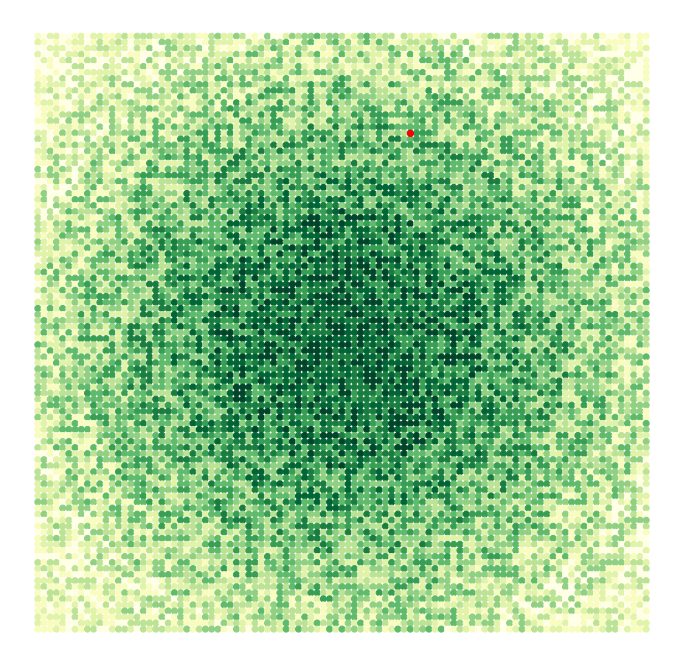

In [26]:
naked_plot([max(in8, key=lambda p: scenic_score(p, in8))], 'ro', size=12)
plt.scatter(*T(in8), c=list(in8.values()), cmap=plt.get_cmap('YlGn'));

# [Day 9](https://adventofcode.com/2022/day/9): Rope Bridge

The input consists of command lines, each of which we can parse as a tuple of two atoms, a command name and an integer:

In [27]:
in9 = parse(9, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2000 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
L 1
R 1
U 1
R 1
L 1
U 2
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('L', 1)
('R', 1)
('U', 1)
('R', 1)
('L', 1)
('U', 2)
...


These are motion commands for the head of a rope; the tail (one knot away) must follow, so that it is always on or adjacent to the head's location.

#### Part 1: Simulate your complete hypothetical series of motions. How many positions does the tail of the rope visit at least once?

The rules for how the tail moves are a bit tricky, but otherwise the control flow is easy. I'll return the set of visited squares (not just their count), in case I need it in part 2. I provide for an optional starting position; this is arbitrary, but it makes it easier to follow the example in the puzzle description if I start at the same place they start at.

In [28]:
def move_rope(motions, start=(0, 4)) -> Set[Point]:
    """Move rope according to `motions`; return set of points visited by tail."""
    deltas = dict(R=East, L=West, U=North, D=South)
    H = T = start # Head and Tail oof the rope
    visited = {start}
    for (op, n) in motions:
        for _ in range(n):
            H = add(H, deltas[op])
            T = move_tail(T, H)
            visited.add(T)
    return visited

def move_tail(T: Point, H: Point) -> Point:
    """Move tail to be close to head if it is not already adjacent."""
    dx, dy = sub(H, T)
    if max(abs(dx), abs(dy)) > 1:
        if dx: # Different column
            T = add(T, (sign(dx), 0))
        if dy: # Different row
            T = add(T, (0, sign(dy)))
    return T
            
answer(9.1, 6236, lambda: len(move_rope(in9)))

0.021 seconds for correct answer: 6,236


#### Part 2: Simulate your complete series of motions on a larger rope with ten knots. How many positions does the tail of the rope visit at least once?

I'll re-write `move_rope` to take an optional argument giving the number of knots in the rope. Then instead of just one `move_tail` per loop, I'll move all the non-head knots in the rope, each one to follow the one immediately in front of it.  I'll show that the re-write is backwards compatible by repeating the two-knot solution from Part 1 and adding the ten-knot solution from Part 2:

In [29]:
def move_rope(motions, start=(0, 4), knots=2) -> Set[Point]:
    """Move multi-`knots` rope according to `motions`; return set of points visited by tail."""
    deltas = dict(R=East, L=West, U=North, D=South)
    rope = [start] * knots # Positions of each knot in the rope
    visited = {start}
    for (op, n) in motions:
        for _ in range(n):
            rope[0] = add(rope[0], deltas[op])
            for k in range(1, knots):
                rope[k] = move_tail(rope[k], rope[k - 1])
            visited.add(rope[-1])
    return visited

answer(9.1, 6236, lambda: len(move_rope(in9)))
answer(9.2, 2449, lambda: len(move_rope(in9, knots=10)))

0.024 seconds for correct answer: 6,236
0.112 seconds for correct answer: 2,449


#### Part 3: Exploration

I can plot the tail of the rope (for various size ropes). One interesting thing is that as the rope gets longer, the tail moves less. I guess the reason is that if any knot in the rope does not end up two spaces away from the one in front of it, then it does not move, and neither do any of the following knots. For a twisty-shaped rope this is bound to happen pretty frequently, so the tailmost knots move less often.

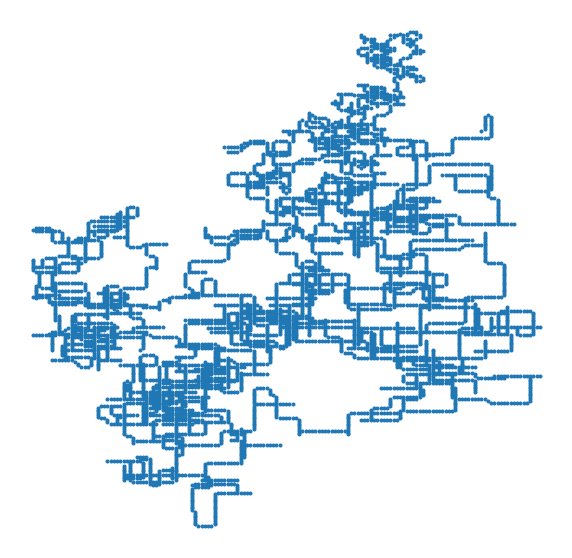

In [30]:
naked_plot(move_rope(in9, knots=2), '.'); 

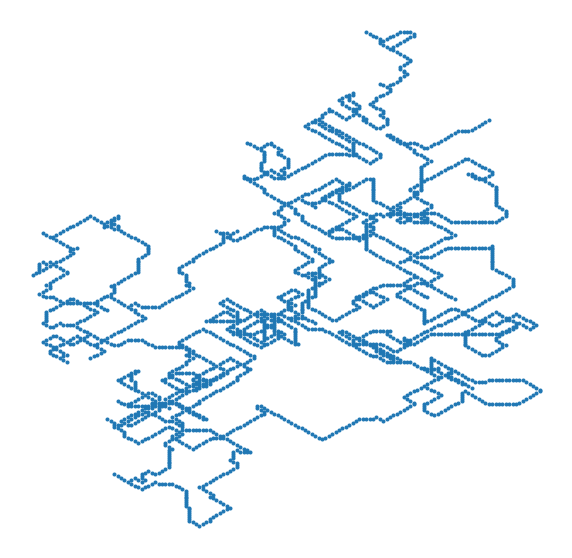

In [31]:
naked_plot(move_rope(in9, knots=10), '.');

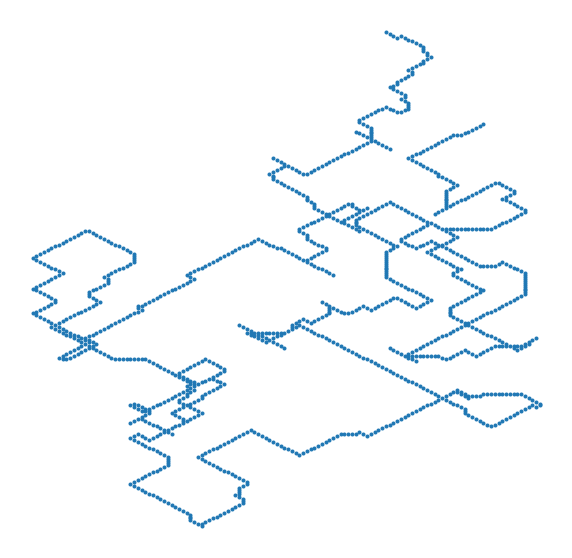

In [32]:
naked_plot(move_rope(in9, knots=20), '.');

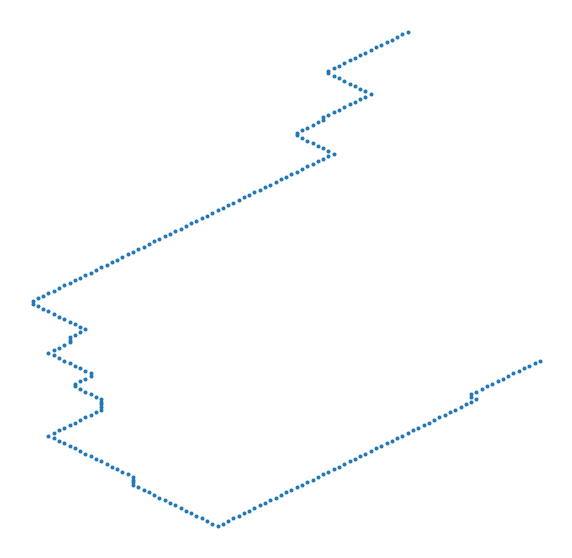

In [33]:
naked_plot(move_rope(in9, knots=100), '.');

<img src="https://pbs.twimg.com/media/FjkFSH_XEAM5BRy?format=jpg&name=medium" width=500 title="Drawing by Gary Grady @GaryJGrady">

# [Day 10](https://adventofcode.com/2022/day/10): Cathode-Ray Tube 

Another puzzle involving running an interpreter on a program. The program is a sequence of lines, each containing one or two atoms:

In [34]:
in10 = parse(10, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 145 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
noop
noop
noop
addx 3
addx 7
noop
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 145 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('noop',)
('noop',)
('noop',)
('addx', 3)
('addx', 7)
('noop',)
...


#### Part 1: Find the signal strength during the 20th, 60th, 100th, 140th, 180th, and 220th cycles. What is the sum of these six signal strengths?

We're never sure what we will need in Part 2, so I'll make the program interpreter output the cycle number and value of X for every cycle. For Part 1, we sum the product of these two for cycles in {20, 60, ... 220}:

In [35]:
def run(program) -> Iterable[Tuple[int, int]]:
    """Execute the program, oputputing (cycle_number, X_register_value) on each cycle.
    Remember that an `addx` instruction takes 2 cycles."""
    X = 1
    cycle = 0
    for (op, *args) in program:
        cycle += 1
        yield (cycle, X)
        if op == 'addx':
            cycle += 1
            yield (cycle, X)
            X += args[0]

answer(10.1, 12560, lambda: sum(c * X for c, X in run(in10) if c in range(20, 221, 40)))

0.000 seconds for correct answer: 12,560


<img src="https://pbs.twimg.com/media/FjpVRo4XEAIbTAY?format=jpg&name=small" width=500 title="Drawing by Gary Grady @GaryJGrady">

#### Part 2: Render the image given by your program. What eight capital letters appear on your CRT?

For Part 2 I'm glad I kept all the `(cycle, X)` pairs. I just need to map `cycle` to `(x, y)` positions on the screen, and plot the result. Then I'll use my eyeballs (not an OCR program) to determine what letters are indicated.

0.036 seconds for correct answer: PLPAFBCL


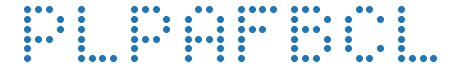

In [36]:
def render(program):
    """As the cycle number scans a 40-pixel wide CRT, turn on pixels
    where register X and the scan position differ by 1 or less."""
    points = []
    for (cycle, X) in run(program):
        x, y = (cycle - 1) % 40, (cycle - 1) // 40
        if abs(X - x) <= 1:
            points.append((x, y))
    naked_plot(points, size=(8, 1))
    
answer(10.2, "PLPAFBCL", lambda: render(in10) or "PLPAFBCL")

# [Day 11](https://adventofcode.com/2022/day/11): Monkey in the Middle

The input is separated into paragraphs where each paragraph is a complex structure describing a monkey. The function `parse_monkey` will parse the paragraph into an instance of the class `Monkey`. I'll use a regular expression, but I'll keep it as simple as possible, so I don't have [two problems](http://regex.info/blog/2006-09-15/247). The `Monkey` class has seven fields; the regular expression has seven `groups`, each of which is either digits `(\d+)` or any characters `(.+)`. Nothing fancy!

In [37]:
Monkey = namedtuple('Monkey', 'n, items, op, arg, test, t, f')

monkey_regex = """\
Monkey (\d+):
  Starting items: (.+)
  Operation: new = old (.) (.+)
  Test: divisible by (\d+)
    If true: throw to monkey (\d+)
    If false: throw to monkey (\d+)"""

def parse_monkey(text) -> Monkey:
    """Parse a paragraph of text into a `Monkey`."""
    [(n, items, op, arg, test, t, f)] = re.findall(monkey_regex, text)
    return Monkey(int(n), ints(items), op, atom(arg), int(test), int(t), int(f))

in11 = parse(11, parse_monkey, paragraphs, show=8)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 55 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
Monkey 0:
  Starting items: 98, 97, 98, 55, 56, 72
  Operation: new = old * 13
  Test: divisible by 11
    If true: throw to monkey 4
    If false: throw to monkey 7

Monkey 1:
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 8 Monkeys:
────────────────────────────────────────────────────────────────────────────────────────────────────
Monkey(n=0, items=(98, 97, 98, 55, 56, 72), op='*', arg=13, test=11, t=4, f=7)
Monkey(n=1, items=(73, 99, 55, 54, 88, 50, 55), op='+', arg=4, test=17, t=2, f=6)
Monkey(n=2, items=(67, 98), op='*', arg=11, test=5, t=6, f=5)
Monkey(n=3, items=(82, 91, 92, 53, 99), op='+', arg=8, test=13, t=1, f=2)
Monkey(n=4, items=(52, 62, 94, 96, 52, 87, 53, 60), op='*'

#### Part 1: What is the level of monkey business after 20 rounds of stuff-slinging simian shenanigans?

Following the instructions for inspecting and throwing items requires careful attention, but is only a dozen lines or so. 

One thing to note: the monkeys will add and remove items from their purview, but my `Monkey` class is immutable. That's a good thing! I don't want to mutate the monkey data structures, because then I would have to re-parse the input file if I wanted to run a computation again. So instead, my `inspect` function will keep track of which monkey has which items by using a dict, `items`. 

The whole point of `inspect` is to keep track of the number of items each monkey inspects in the `inspected` Counter, and return the Counter at the end. Then the function `monkey_business` can pick out the two busiest monkeys to compute the puzzle's final answer.

In [38]:
def inspect(monkeys, rounds=1) -> Counter:
    """Simulate the monkeys doing inspections for `rounds`.
    Don't mutate monkeys. Return a Counter of items inspected by each monkey."""
    inspected = Counter()
    items = {monkey.n: list(monkey.items) for monkey in monkeys}
    ops = {'+': operator.add, '*': operator.mul, '-': operator.sub}
    for round in range(rounds):
        for monkey in monkeys:
            inspected[monkey.n] += len(items[monkey.n])
            for old in items[monkey.n]:
                arg = (old if monkey.arg == 'old' else monkey.arg)
                new = ops[monkey.op](old, arg) // 3
                throw = (monkey.t if (new % monkey.test == 0) else monkey.f)
                items[throw].append(new)
            items[monkey.n] = []    
    return inspected

def monkey_business(inspected) -> int:
    """The product of the number of inspections by the two busiest monkeys."""
    return prod(sorted(inspected.values())[-2:])

answer(11.1, 54036, lambda: monkey_business(inspect(in11, 20)))

0.001 seconds for correct answer: 54,036


#### Part 2: Worry levels are no longer divided by three after each item is inspected; you'll need to find another way to keep your worry levels manageable. Starting again from the initial state in your puzzle input, what is the level of monkey business after 10000 rounds?

The puzzle instructions are warning me that worry levels will be so high that they are unmanageable. Did they mean too high for a 64-bit int, or too high even for a language like Python with arbitrary-length integers? I ran `inspect` for 200 rounds and found the largest worry level was over a million digits. I don't think a run for 10,000 rounds is feasible.

"No problem!," I thought to myself; since each monkey uses the worry level for one purpose only–to see if it is divisible by their test number–we should be able to compute with the worry level modulo the test number. I tried that, but AoC told me that my answer was wrong. 

So I thought to myself again. Harder. My error was that worry levels get passed from one monkey to the next, and the next monkey will have a different test number, and should be dealing with worry levels modulo *that* test number. So I should be working with worry levels modulo the product of *all* the monkeys' test numbers; I call this product `m`. (I could use the least common multiple, but product works fine). My revision of`inspect` is backwards compatible, does all worry computations modulo `m`, and takes an optional argument, the `boredom` factor, which by default is 3 (for Part 1), but you specify `boredom=1` for Part 2.

In [39]:
def inspect(monkeys, rounds=1, boredom=3) -> Counter:
    """Simulate the monkeys doing inspections for `rounds`.
    Don't mutate monkeys. Return a Counter of items inspected by each monkey.
    Compute worry levels modulo the product of all the monkeys' test numbers."""
    inspected = Counter()
    items = {monkey.n: list(monkey.items) for monkey in monkeys}
    ops = {'+': operator.add, '*': operator.mul, '-': operator.sub}
    m = prod(monkey.test for monkey in monkeys)
    for round in range(rounds):
        for monkey in monkeys:
            inspected[monkey.n] += len(items[monkey.n])
            for old in items[monkey.n]:
                arg = (old if monkey.arg == 'old' else monkey.arg)
                new = (ops[monkey.op](old, arg) % m) // boredom
                throw = (monkey.t if (new % monkey.test == 0) else monkey.f)
                items[throw].append(new)
            items[monkey.n] = []    
    return inspected

answer(11.1, 54036,       lambda: monkey_business(inspect(in11, 20)))
answer(11.2, 13237873355, lambda: monkey_business(inspect(in11, 10_000, boredom=1)))

0.001 seconds for correct answer: 54,036
0.278 seconds for correct answer: 13,237,873,355


<img src="https://pbs.twimg.com/media/FjuIVZcXEAAEDvl?format=jpg&name=small" width=400 title="Drawing by Gary Grady @GaryJGrady">

# [Day 12](https://adventofcode.com/2022/day/12): Hill Climbing Algorithm

The input is a grid of heights, from `'a'` (low) to `'z'` (high), with two special heights, `'S'` for the start location (the lowest) and `'E'` for the end location (the highest height, with the best signal reception). I'll use `Grid(parse(...))` as I've done before, and define `hill_height` to translate the letter heights to integers:

In [40]:
def hill_height(line, heights='SabcdefghijklmnopqrstuvwxyzE') -> Tuple[int]: 
    """Translate each letter in `line` into a height from 0 to 27."""
    return tuple(map(heights.index, line))

in12 = Grid(parse(12, hill_height))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 41 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
abccccccccaaaaaaaccaaaaaaaaaaaaaaaaccccccccccccccccccccccccccccccccccccaaaaaa
abccccccccaaaaaaaccaaaaaaaaaaaaaaaaccccccccccccccccccccccccccccccccccccaaaaaa
abccccccccccaaaaaaccaaaaaaaaaaaaaaaaccccccccccccccccacccccccccccccccccccaaaaa
abcccccaaaacaaaaaaccaaaaaaaaaaaaaaaaacccccccccccccccaaaccccaccccccccccccccaaa
abccccaaaaacaaccccccaaaaaacaaacaacaaaaaaacccccccccccaaaacccaacccccccccccccaaa
abaaccaaaaaaccccaaacaaaacacaaacaaccaaaaaacccccccccccaklaccccccccccccccccccaac
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 41 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
(1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 

#### Part 1: What is the fewest steps required to move from your current position to the location that should get the best signal?

The function `hill_climb` will pick out the initial and goal locations and call `A_star_search`. This isn't a generic `GridProblem` though, because we can't transition to *any* neighbor, only to the ones that are no more than one unit higher. The class `HillClimbProblem` imposes that constraint:

In [41]:
def hill_climb(grid) -> Node:
    """Find the initial and goal locations in grid, and return a least-cost path."""
    initial = the(loc for loc in grid if grid[loc] == 0)
    goal    = the(loc for loc in grid if grid[loc] == 27)
    return A_star_search(HillClimbProblem(initial, goal, grid=grid))

class HillClimbProblem(GridProblem):
    """A GridProblem where you can't climb upward more than one height amount per step."""
    
    def action_cost(self, s1, a, s2): return 1
    
    def actions(self, loc):
        """All neighboring squares that are no more than one unit higher."""
        grid = self.grid
        return [p for p in grid.neighbors(loc) if grid[p] <= grid[loc] + 1]
    
answer(12.1, 394, lambda: hill_climb(in12).path_cost)

0.039 seconds for correct answer: 394


#### Part 2: What is the fewest steps required to move starting from any square with elevation *a* to the location that should get the best signal?

Part 2 asks what the shortest path would be if we could start at any location with height 1 (represented by an `'a'` in the input). I could repeat the search for each such location. How many would that be?

In [42]:
Counter(in12.values())[1]

930

Almost a thousand locations; so the search would take about 30 seconds. [Who's got that kind of time?](https://www.gocomics.com/calvinandhobbes/1995/08/17) Instead I'll invent yet another problem subclass, `HillClimbProblem2`, which starts at a dummy state that is off the grid, and can transition with zero cost from that state to any location with  height 1:

In [43]:
off_grid = (-1, -1) # A dummy location that is not on grid

def hill_climb2(grid) -> Node:
    goal = the(loc for loc in grid if grid[loc] == 27)
    return A_star_search(HillClimbProblem2(off_grid, goal, grid=grid))

class HillClimbProblem2(GridProblem):
    """Like HillClimbProblem, but with a free pass to any location with height 1."""
    
    def action_cost(self, s1, a, s2): return 0 if s1 == off_grid else 1
    
    def actions(self, loc):
        grid = self.grid
        if loc == off_grid:
            return [p for p in grid if grid[p] == 1] # Go to any location with an `a`
        else:
            return [p for p in grid.neighbors(loc) if grid[p] <= grid[loc] + 1]
        
answer(12.2, 388, lambda: hill_climb2(in12).path_cost)

0.038 seconds for correct answer: 388


<img src="https://pbs.twimg.com/media/FjzvfwfXEB4Pnuc?format=jpg&name=small" width=400>

#### Part 3: Exploration

I'm interested in seeing what the landscape looks like. We can repurpose the code used to show the forest:

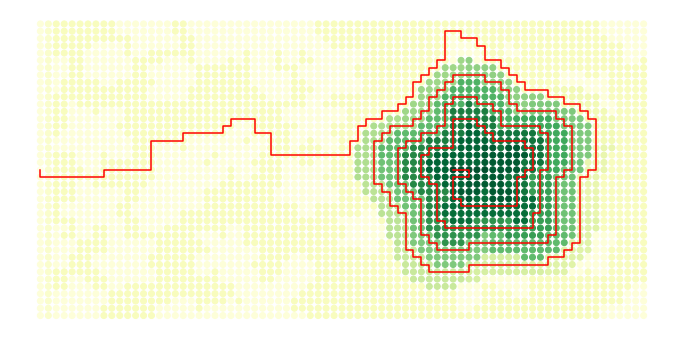

In [44]:
naked_plot(path_states(hill_climb(in12)), 'r-', size=(12, 6))
plt.scatter(*T(in12), c=list(in12.values()),  cmap=plt.get_cmap('YlGn'));

# [Day 13](https://adventofcode.com/2022/day/13): Distress Signal


The input is divided into paragraphs, where each paragraph has two nested list structures, with integer values.

In [45]:
in13 = parse(13, (lambda text: mapt(ast.literal_eval, text.splitlines())), paragraphs)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 449 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
[[[[],[7,10,6,5],[],[8]],0,1,[[8,10]],4],[[[4,0,3,2,0]],7],[[],3,[[0,2],8,5],[],[[2,10,4,6]]],[3 ...
[[0,2,7],[],[10,[[0,7,3,6]]],[2,[8],3]]

[[],[[0,8,[],[0,8,6,7,10]],4,10,[[],9,[1],4,10],3],[[7,1,0],10,[[1,10,7,8],[3,7],[3,6],5],1,0],[ ...
[[[],0,[[4,5,10],8]],[0,5],[[[1,8,8,8],2],0,[7,9],3]]

...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 150 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
([[[[], [7, 10, 6, 5], [], [8]], 0, 1, [[8, 10]], 4], [[[4, 0, 3, 2, 0]], 7], [[], 3, [[0, 2], 8 ...
([[], [[0, 8, [], [0, 8, 6, 7, 10]], 4, 10, [[], 9, [1], 4, 10], 3], [[7, 1, 0], 10, [[1, 10, 7, ...
([[3, [[10, 2, 8], 3, 0, [2, 1

#### Part 1: Determine which pairs of packets are already in the right order. What is the sum of the indices of those pairs?

The notion of "right order" is almost the same as "less than", except that an integer can match against a singleton list. Also, I was confused for a bit because the rules don't say whether two identical lists are in the right order or not; the rules just say you should "continue checking" in that case. I decided that I should not define a Boolean truth predicate; rather it should be a *ternary* comparison function. 

By convention, a Python comparison function, `compare(left, right)`, returns a negative number if `left < right`, zero if they are equal, and a positive number if `left > right`. I'll implement that:

In [46]:
def compare(left, right) -> int:
    """Are the two packets in the right order? 
    Negative number for right order; 0 for equal; positive for wrong order."""
    types = (type(left), type(right))
    if   types == (int,  int):  return left - right
    elif types == (int,  list): return compare([left], right)
    elif types == (list, int):  return compare(left, [right])
    elif types == (list, list): return first_true(map(compare, left, right), 
                                                  default=len(left) - len(right))

The call to `first_true` (from my [AdventUtils](AdventUtils.ipynb)) says to `compare` respective successive elements of the two lists one by one, and to return the first truthy (i.e. non-zero) comparison, or if one of the two lists is exhausted first,  return the comparison of the list lengths. 

I threw in some test cases to gain some confidence that I got it right: 

In [47]:
assert compare([1,1,3,1,1], [1,1,5,1,1]) < 0
assert compare([[1],[2,3,4]], [[1],4]) < 0
assert compare([7,7,7,7], [7,7,7])  > 0  
assert compare([1,[2,[3,[4,[5,6,7]]]],8,9], [1,[2,[3,[4,[5,6,0]]]],8,9]) > 0
assert compare([1,2,3], [1,2,3]) == 0

At this point I'm ready to compute the answer, and was happy to see it worked the first time:

In [48]:
answer(13.1, 5882, lambda: sum(i for i, (L, R) in enumerate(in13, 1) if compare(L, R) < 0))

0.001 seconds for correct answer: 5,882


#### Part 2: Organize all of the packets into the correct order. What is the decoder key for the distress signal?

This should be easy; all I have to do is sort using `compare`, then look up the resulting indices of the two divider packets (taking care to use 1-based rather than 0-based indexing). I tried to sort using `key=compare` and got an error message reminding me how foolish I am: `compare` is not a key function (of one argument), it is a comparison function (of two arguments).

In Python 2, the `sorted` function accepted a two-argument `cmp` function, but in Python 3 that functionality is gone. I had to look it up to find that the `functools.cmp_to_key` function converts a comparison function to a key function. 

In [49]:
def decode(packets, dividers=[[[2]],[[6]]]):
    """Sort the packets and the dividers, and return their product of the indices of the dividers."""
    ordered = sorted(append(packets) + dividers, key=functools.cmp_to_key(compare))
    return prod(ordered.index(d) + 1 for d in dividers)
    
answer(13.2, 24948, lambda: decode(in13))

0.009 seconds for correct answer: 24,948


# [Day 14](https://adventofcode.com/2022/day/14): Regolith Reservoir

I happen to know that *regolith* is loose dust on the surface of a planet; the Apollo astronauts refered to the lunar regolith. I'm not sure if that will help with today's puzzle. 

The first task is to parse each line into a sequence of (x, y) points, representing the vertices of a zig-zag path:

In [50]:
in14 = parse(14, lambda line: batched(ints(line), 2))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 163 lines:
────────────────────────────────────────────────────────────────────────────────────────────────────
494,71 -> 498,71
490,23 -> 490,17 -> 490,23 -> 492,23 -> 492,18 -> 492,23 -> 494,23 -> 494,16 -> 494,23 -> 496,23 ...
472,131 -> 472,134 -> 466,134 -> 466,141 -> 484,141 -> 484,134 -> 476,134 -> 476,131
490,23 -> 490,17 -> 490,23 -> 492,23 -> 492,18 -> 492,23 -> 494,23 -> 494,16 -> 494,23 -> 496,23 ...
478,104 -> 478,103 -> 478,104 -> 480,104 -> 480,96 -> 480,104 -> 482,104 -> 482,97 -> 482,104 -> ...
469,53 -> 474,53
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 163 lists:
────────────────────────────────────────────────────────────────────────────────────────────────────
[(494, 71), (498, 71)]
[(490, 23), (490, 17), (490, 23), (492, 23), (492, 18), (492, 23), (494, 23), (494, 16

#### Part 1: Using your scan, simulate the falling sand. How many units of sand come to rest before sand starts flowing into the abyss below?

Now we have to simulate the movement of each particle of falling sand as they slide downwards.  The particles prefer to go straight downwards (South), but if that location is occupied they will go diagonally Southwest, and if that is occupied, Southeast. If all three are blocked, they stop.  The simulation continues until one particle falls off the bottom. At that point, we return the number of particles that have come to rest (not counting the one that fell off the bottom).

I'll just return the number of time steps, but because Part 2 might want some more information, I'll have my `simulate_sand` function accept a grid as input and modify the grid. Perhaps in Part 2 we'll want to take a look at how the grid was modified.

In [51]:
def put_lines(grid, lines) -> Grid:
    "Place the lines of rock onto the grid."
    for line in lines:
        for ((x0, y0), (x1, y1)) in sliding_window(line, 2):
            for p in cross_product(cover(x0, x1), cover(y0, y1)):
                grid[p] = '#'
    return grid

def simulate_sand(grid, lines, entry=(500, 0)) -> int:
    put_lines(grid, lines)
    bottom  = max(map(Y_, grid)) # The bottom-most piece of rock
    falling = [South, add(South, West), add(South, East)] # The directions sand can fall
    for t in count_from(1):
        loc = entry # A new sand particle enters
        while True: # ... and falls
            points = [add(loc, dir) for dir in falling]
            loc2 = first((p for p in points if p not in grid), default=loc)
            if loc == loc2: # Sand comes to rest
                grid[loc] = 'o'
                break
            elif Y_(loc) > bottom: # Sand falls into endless void
                return t - 1
            loc = loc2

answer(14.1, 728, lambda: simulate_sand(Grid(), in14))

0.136 seconds for correct answer: 728


I'm ashamed to say the first time I ran this, I got an infinite loop; I had neglected to include the `loc = loc2` line at the end of the function. I knew I had to do that; I just forgot. And I guess I prefer to think functionally, not in terms of updates, so I messed up. After correcting for that, I had an off-by-one error, because I misread the instructions and thought the last unit of sand, which falls into the void, should be counted, but it should not.

#### Part 2: Using your scan, simulate the falling sand until the source of the sand becomes blocked. How many units of sand come to rest?

In Part 2, the sand no longer falls off the bottom; instead there is a *floor* at the bottom of the cave (specified as 2 units below the deepest known rock line). Since the [angle of repose](https://en.wikipedia.org/wiki/Angle_of_repose) of the sand is 45°, we need to make the floor wide enough to cover that (and throw in a bit extra to make sure; I added "2" to the `dx` variable, which tells how far away from the entry point the floor needs to extend). Eventually the sand will back up and cover the entry point; that's a second way to end the simulation.

I'll re-write `simulate_sand` so that it handles both ways to end the simulation. If you want the Part 1 way, specify `floor=0` (the default); this means there is no floor. If you want the Part 2 way, specify, say, `floor=2` to put the floor two units below the lowest rock.

In [52]:
def simulate_sand(grid, lines, entry=(500, 0), floor=0) -> int:
    put_lines(grid, lines)
    Ymax = max(map(Y_, grid)) + floor # Y-coordinate of the floor
    falling = [South, add(South, West), add(South, East)] # The directions sand can fall
    if floor: # put down a floor line that is wide enough to catch anything from the entry
        x, dx = X_(entry), Ymax + 2
        put_lines(grid, [[(x - dx, Ymax), (x + dx, Ymax)]])  
    for t in count_from(1):
        loc = entry # A new sand particle enters
        while True: # The sand particle falls
            points = [add(loc, dir) for dir in falling]
            loc2 = first((p for p in points if p not in grid), default=loc)
            if loc2 == entry: # Stop if the entry point is blocked
                return t
            if loc == loc2: # Sand comes to rest
                grid[loc2] = 'o'
                break
            elif Y_(loc2) > Ymax: # Sand falls into endless void
                grid[loc2] = 'o'
                return t - 1
            loc = loc2
            
answer(14.1,   728, lambda: simulate_sand(Grid(), in14))
answer(14.2, 27623, lambda: simulate_sand(Grid(), in14, floor=2))

0.136 seconds for correct answer: 728
6.396 seconds for correct answer: 27,623


Uh, oh! Up to now my solutions have been speedy enough, but this one takes 6 seconds, 20 times worse than the slowest solution so far. I hope the coming days don't continue this trend.

#### Part 3: Exploration

Let's get a picture of the rock lines and the accumulated sand. (I didn't need access to the grid for Part 2, but now I'm glad to have it).

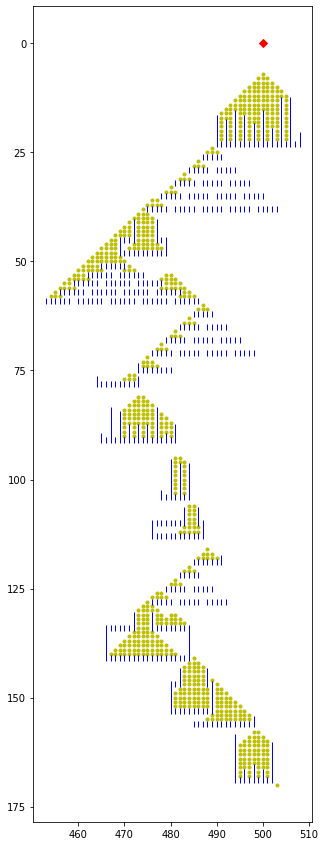

In [53]:
grid = Grid({(500, 0): '+'})
simulate_sand(grid, in14)
grid.plot({'+': 'rD', 'o': 'y.', '#': 'b|'}, figsize=(5, 15))

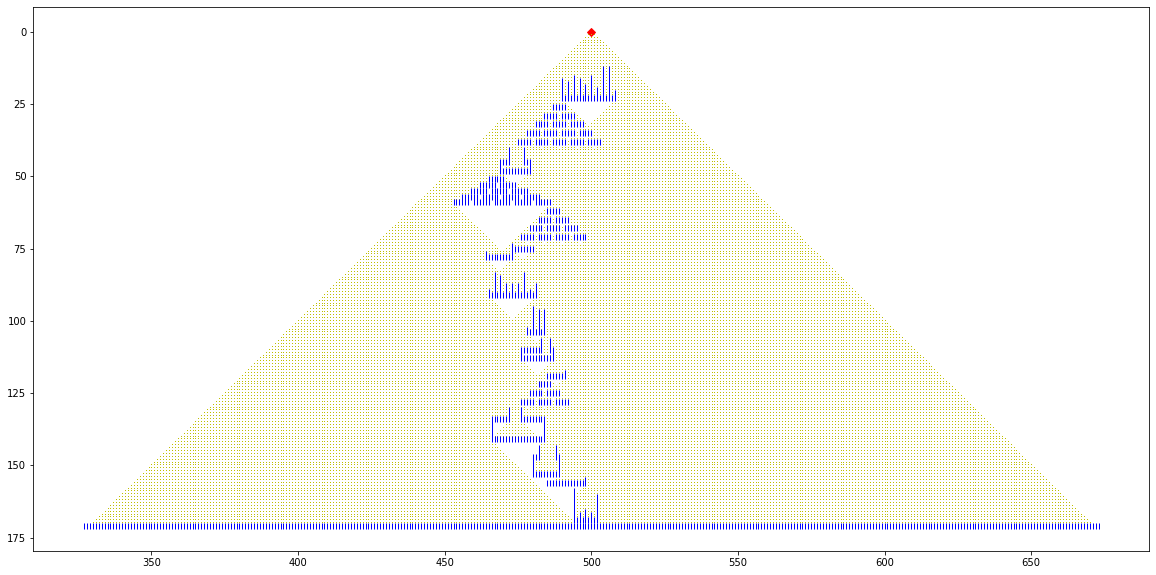

In [54]:
grid2 = Grid({(500, 0): '+'})
simulate_sand(grid2, in14, floor=2)
grid2.plot({'+': 'rD', 'o': 'y,', '#': 'b|'}, figsize=(20, 10))

# Summary

The results so far, with run times:

In [55]:
answers

{1.1: '0.000 seconds for correct answer: 70,116',
 1.2: '0.000 seconds for correct answer: 206,582',
 2.1: '0.001 seconds for correct answer: 13,268',
 2.2: '0.001 seconds for correct answer: 15,508',
 3.1: '0.000 seconds for correct answer: 8,401',
 3.2: '0.000 seconds for correct answer: 2,641',
 4.1: '0.000 seconds for correct answer: 477',
 4.2: '0.000 seconds for correct answer: 830',
 5.1: '0.000 seconds for correct answer: SHQWSRBDL',
 5.2: '0.000 seconds for correct answer: CDTQZHBRS',
 6.1: '0.001 seconds for correct answer: 1,987',
 6.2: '0.002 seconds for correct answer: 3,059',
 7.1: '0.001 seconds for correct answer: 1,232,307',
 7.2: '0.001 seconds for correct answer: 7,268,994',
 8.1: '0.050 seconds for correct answer: 1,829',
 8.2: '0.057 seconds for correct answer: 291,840',
 9.1: '0.024 seconds for correct answer: 6,236',
 9.2: '0.112 seconds for correct answer: 2,449',
 10.1: '0.000 seconds for correct answer: 12,560',
 10.2: '0.036 seconds for correct answer: PLPAFB